## The data
The team assembled the following file:

#### Redesign test data
- "treatment" - "yes" if the user saw the new version of the landing page, no otherwise.
- "new_images" - "yes" if the page used a new set of images, no otherwise.
- "converted" - 1 if the user joined the site, 0 otherwise.

The control group is those users with "no" in both columns: the old version with the old set of images.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('./data/redesign.csv')
df.head()

,treatment,new_images,converted
0,yes,yes,0
1,yes,yes,0
2,yes,yes,0
3,yes,no,0
4,no,yes,0


## Data Preparation

In [2]:
df.value_counts()

treatment  new_images  converted
no         no          0            9037
           yes         0            8982
yes        yes         0            8970
           no          0            8906
                       1            1215
           yes         1            1151
no         yes         1            1139
           no          1            1084
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40484 entries, 0 to 40483
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   treatment   40484 non-null  object
 1   new_images  40484 non-null  object
 2   converted   40484 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 949.0+ KB


## Contingency Table of Convertion Rate

In [4]:
# Create a contingency table using pivot_table
contingency_table = pd.pivot_table(df, values='converted', index=['treatment'], columns=['new_images'], aggfunc=np.sum)

# add the row and column totals
contingency_table.loc['Total'] = contingency_table.sum()
contingency_table['Total'] = contingency_table.sum(axis=1)

# calculate the conversion rates and add them to the table
contingency_table_percent = contingency_table.copy()
for row in contingency_table_percent.index:
    for col in contingency_table_percent.columns:
        contingency_table_percent.loc[row, col] = f"{int(contingency_table_percent.loc[row, col])}/{int(contingency_table.loc[row, 'Total'])} ({contingency_table_percent.loc[row, col] / contingency_table.loc[row, 'Total']:.0%})"
        
# print the contingency table with the conversion rates
print(contingency_table_percent)

new_images               no              yes             Total
treatment                                                     
no          1084/2223 (49%)  1139/2223 (51%)  2223/2223 (100%)
yes         1215/2366 (51%)  1151/2366 (49%)  2366/2366 (100%)
Total       2299/4589 (50%)  2290/4589 (50%)  4589/4589 (100%)


In [5]:
import scipy.stats as stats

# Define the contingency table
contingency_table = np.array([[1084, 1139], [1215, 1151]])

# Calculate the chi-square statistic and p-value
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)

# Print the test results
print("A/B test results:")
print("Chi-square statistic: {:.2f}".format(chi2_stat))
print("P-value: {:.4f}".format(p_val))


A/B test results:
Chi-square statistic: 2.97
P-value: 0.0847


From these results, we can say that the chi-square test statistic is 2.97 and the p-value is 0.0847. The p-value is greater than the common threshold of 0.05, which suggests that there is not enough evidence to reject the null hypothesis that the two treatments have the same conversion rate.

## Which version of the website should they use?

Based solely on the results of the A/B test, we cannot definitively say which version of the website should be used. The test results suggest that there is not enough evidence to reject the null hypothesis that the two treatments have the same conversion rate. However, other factors such as the practical significance of any observed differences between the treatments should also be taken into consideration.

Therefore, it is recommended to conduct further analysis and consider other factors before making a decision about which version of the website to use. This may include considering the cost and effort required to implement each version, user feedback and preferences, and any other relevant factors.

Anyways we can make a suggestion based on the results in the contingency table visualized in a Pie Chart 

([<matplotlib.patches.Wedge at 0x7fabb28d8be0>,
 [Text(0.8107577237329527, 0.7434190698437599, 'No_No'),
  Text(-0.7028592465149577, 0.8461612609830504, 'No_Yes'),
  Text(-0.8168375880355241, -0.7367335710908711, 'Yes_No'),
  Text(0.7758180497882989, -0.7798117424242088, 'Yes_Yes')],
 [Text(0.44223148567251963, 0.40550131082386903, '23.6%'),
  Text(-0.38337777082634056, 0.46154250599075475, '24.8%'),
  Text(-0.445547775292104, -0.4018546751404751, '26.5%'),
  Text(0.42317348170270846, -0.42535185950411386, '25.1%')])

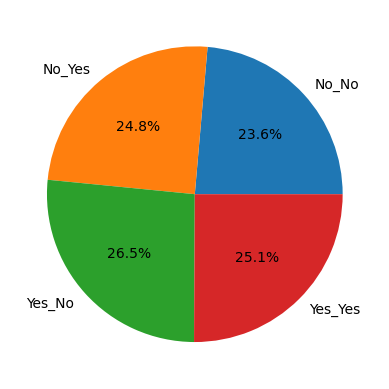

In [6]:
import matplotlib.pyplot as plt
labels = 'No_No', 'No_Yes', 'Yes_No', 'Yes_Yes'
sizes = contingency_table.flatten().tolist() 

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

In base to the Pai Chart we can suggest that the use of a **New Page Design in combination of Old Images** is the best way to follow, but also can say that this is no a risk decition, since the differences between these method and the others is not significant.